In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df3=pd.read_csv(r"C:\Users\athar\OneDrive\Desktop\Practical\DSPrac\Datasets\Iris.csv")
df3

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df3.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df3.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

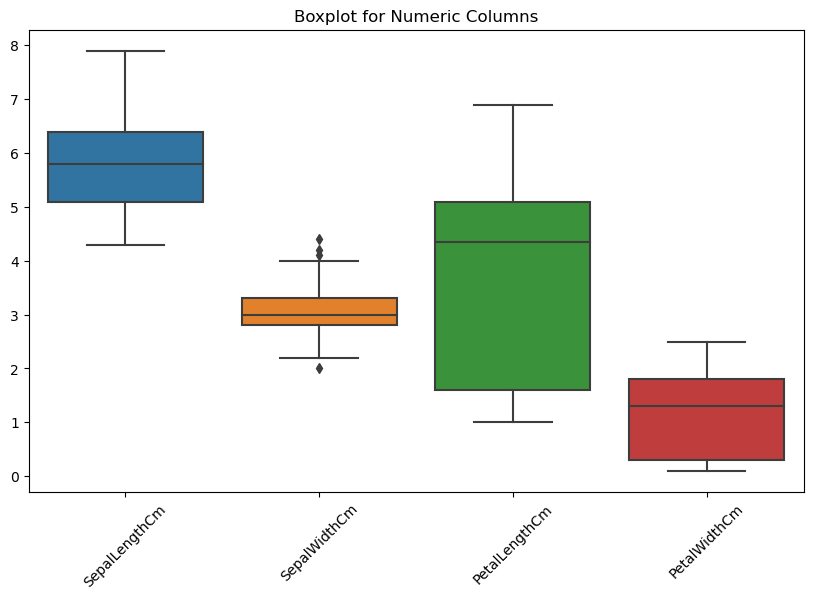

In [3]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [5]:
Q1 = df3[numeric_cols].quantile(0.25)
Q3 = df3[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (df3[numeric_cols] < lower_bound) | (df3[numeric_cols] > upper_bound)

df3_no_outliers = df3[~outlier_mask.any(axis=1)]

print("Dataset before outlier removal:", df3.shape)
print("Dataset after outlier removal:", df3_no_outliers.shape)

Dataset before outlier removal: (150, 6)
Dataset after outlier removal: (146, 6)


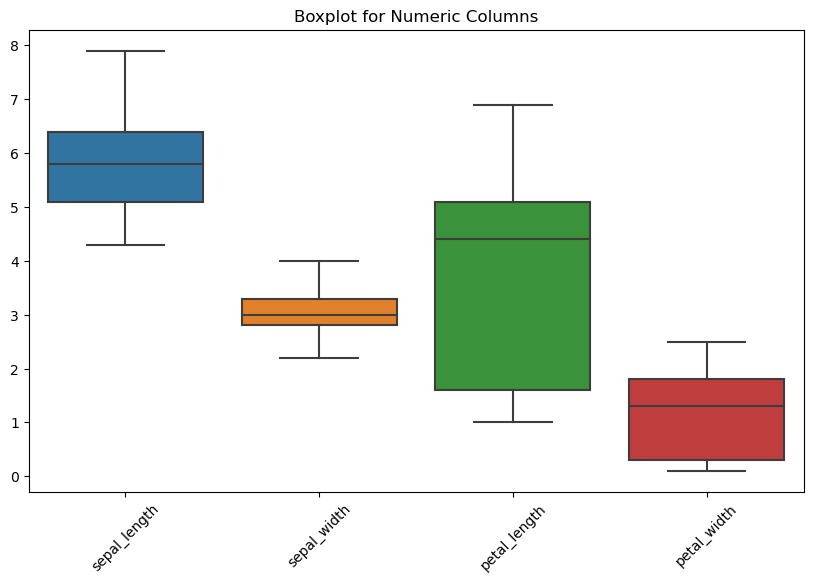

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3_no_outliers[numeric_cols])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [6]:
numeric_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

scaler = MinMaxScaler()
df3[numeric_cols] = scaler.fit_transform(df3[numeric_cols])
df3[numeric_cols].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [7]:
setosa=df3[df3['Species']=='Iris-setosa']
versicolor=df3[df3['Species']=='Iris-versicolor']
virginica=df3[df3['Species']=='Iris-virginica']

In [8]:
df3.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,0.196111,0.590833,0.078644,0.060000
Iris-versicolor,75.5,0.454444,0.320833,0.552542,0.510833
Iris-virginica,125.5,0.635556,0.405833,0.771525,0.802500


In [9]:
df3.groupby('Species').median()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,0.194444,0.583333,0.084746,0.041667
Iris-versicolor,75.5,0.444444,0.333333,0.567797,0.500000
Iris-virginica,125.5,0.611111,0.416667,0.771186,0.791667


In [10]:
df3.groupby('Species').std()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,14.57738,0.097914,0.158760,0.029409,0.044671
Iris-versicolor,14.57738,0.143381,0.130749,0.079646,0.082397
Iris-virginica,14.57738,0.176633,0.134374,0.093541,0.114438


In [11]:
df3.groupby('Species').quantile(0.25)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,13.25,0.138889,0.468750,0.067797,0.041667
Iris-versicolor,63.25,0.361111,0.218750,0.508475,0.458333
Iris-virginica,113.25,0.534722,0.333333,0.694915,0.708333


In [12]:
df3.groupby('Species').quantile(0.75)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,37.75,0.250000,0.697917,0.097458,0.083333
Iris-versicolor,87.75,0.555556,0.416667,0.610169,0.583333
Iris-virginica,137.75,0.722222,0.489583,0.826271,0.916667


In [13]:
df3.groupby('Species').min()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,0.000000,0.125000,0.000000,0.000000
Iris-versicolor,51,0.166667,0.000000,0.338983,0.375000
Iris-virginica,101,0.166667,0.083333,0.593220,0.541667


In [14]:
df3.groupby('Species').max()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,0.416667,1.000000,0.152542,0.208333
Iris-versicolor,100,0.750000,0.583333,0.694915,0.708333
Iris-virginica,150,1.000000,0.750000,1.000000,1.000000


In [23]:
setosa.mean(numeric_only=True)

sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
dtype: float64

In [24]:
setosa.median(numeric_only=True)

sepal_length    5.0
sepal_width     3.4
petal_length    1.5
petal_width     0.2
dtype: float64

In [25]:
setosa.std(numeric_only=True)

sepal_length    0.352490
sepal_width     0.379064
petal_length    0.173664
petal_width     0.105386
dtype: float64

In [29]:
virginica.std(numeric_only=True)

sepal_length    0.635880
sepal_width     0.322497
petal_length    0.551895
petal_width     0.274650
dtype: float64

In [30]:
virginica.mean(numeric_only=True)

sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64

In [31]:
virginica.median(numeric_only=True)

sepal_length    6.50
sepal_width     3.00
petal_length    5.55
petal_width     2.00
dtype: float64

In [32]:
versicolor.median(numeric_only=True)

sepal_length    5.90
sepal_width     2.80
petal_length    4.35
petal_width     1.30
dtype: float64

In [33]:
versicolor.mean(numeric_only=True)

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

In [34]:
versicolor.std(numeric_only=True)

sepal_length    0.516171
sepal_width     0.313798
petal_length    0.469911
petal_width     0.197753
dtype: float64